In [ ]:
import torch
from torch import nn

import matplotlib.pyplot as plt

import numpy as np

In [ ]:

model = nn.Sequential(
    nn.Linear(2, 5),
    nn.Sigmoid(),
    nn.Linear(5, 1),
)

In [ ]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.01,momentum=0.9)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([2])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


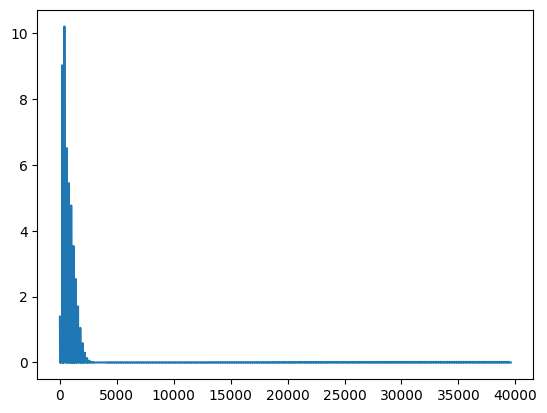

In [ ]:
loss_list=[]

# du/dx + du/dy = 1 + 2y + 2x , u(0,0) = 0.0

x = np.linspace(0,1,200)
y = np.linspace(0,1,200)

for j in range(len(y)-1):
    for i in range(len(x)-1):
        u00 = model(torch.tensor([0.0,0.0]))
        xa = float(x[i])
        xb = float(x[i+1])
        ya = float(y[j])
        yb = float(y[j+1])

        ua = model(torch.tensor([xa,ya]))
        ub = model(torch.tensor([xb,yb]))

        dudx = (ub-ua)/(xb-xa)
        dudy = (ub-ua)/(yb-ya)

        loss1 = criterion(dudx + dudy , torch.tensor([ 1 + 2*yb + 2*xb ]))
        loss2 = criterion(u00, torch.tensor([0.0,0.0]))
        loss = loss1 + loss2

        ####################
        loss_list.append(loss.item())
        ####################
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

plt.plot(loss_list)

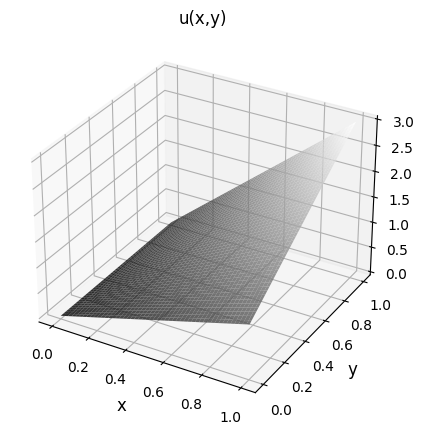

In [ ]:
#@title draw 3d
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
############################################## draw 3d
def function(x, y):
	return x+2*x*y


x = np.linspace(0, 1, 200)
y = np.linspace(0, 1, 200)
##############################################
X, Y = np.meshgrid(x, y)
Z = function(X, Y)

fig = plt.figure(figsize=(6, 5))
ax = plt.axes(projection='3d')

ax.plot_surface(X, Y, Z, cmap='gray', alpha=0.8)

ax.set_title('u(x,y)')
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('y', fontsize=12)
ax.set_zlabel('z', fontsize=12)

plt.show()


<Figure size 640x480 with 0 Axes>

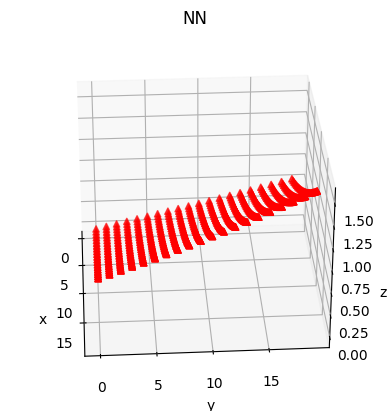

In [ ]:
#@title true plot
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
fig = plt.figure()
# Define a list of tuples with x, y, and z coordinates
data = []
for x in range(0,20):
    for y in range(0,20):
        z = model(torch.tensor([x/20,y/20]))[0].item()
        data.append([x,y,z])
# Extract the x, y, and z coordinates from the list of tuples
x = [t[0] for t in data]
y = [t[1] for t in data]
z = [t[2] for t in data]

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#ax.scatter(x, y, z)

# Set the axis labels and title
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('NN')
#plt.show()
def init():
    ax.scatter(x, y, z, c='r', marker='^')
    #ax.plot_wireframe(X, Y, Z, rstride=5, cstride=5)
    return fig,
def animate(i):
    ax.view_init(elev=30., azim=3.6*i)
    return fig,
p = ax.scatter(x,y,z,c='r', marker='')
# Animate
ani = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=40, interval=100, blit=True)

HTML(ani.to_html5_video())

In [ ]:
model(torch.tensor([0.5,0.5]))[0].item()

0.7826243042945862

In [ ]:
#@title draw 3d nn
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
############################################## draw 3d
def function(x, y):
    #x = torch.from_numpy(x).float()
    #y = torch.from_numpy(y).float()
    print(x,y)
    pass

x = np.linspace(0, 1, 200)
y = np.linspace(0, 1, 200)
##############################################
X, Y = np.meshgrid(x, y)
Z = function(X, Y)

fig = plt.figure(figsize=(6, 5))
ax = plt.axes(projection='3d')

ax.plot_surface(X, Y, Z, cmap='gray', alpha=0.8)

ax.set_title('u(x,y)')
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('y', fontsize=12)
ax.set_zlabel('z', fontsize=12)

plt.show()


In [ ]:
#@title plot
def function(x, y):
    #x = torch.from_numpy(x).float()
    #y = torch.from_numpy(y).float()
    #print(x)

    pass

x = np.linspace(0, 1, 200)
y = np.linspace(0, 1, 200)
##############################################
X, Y = np.meshgrid(x, y)
Z = function(X, Y)

In [ ]:
#@title plot
import numpy as np
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = [6, 5]
plt.rcParams["figure.autolayout"] = True

# List of tuples
data = [[1, 3, 2], [3, 5, 2], (4, 7, 4)]

# Data points from the list of tuples
x, y, z = zip(*data)

x, y = np.meshgrid(x, y)

#h = x ** 2 + y ** 2

fig = plt.figure()

ax = plt.axes(projection='3d')
# Surface plot
ax.plot_surface(x, y, data, cmap='plasma')

plt.show()

In [ ]:
#@title plot
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


data = np.array(data)
length = data.shape[0]
width = data.shape[1]
x, y = np.meshgrid(np.arange(length), np.arange(width))

fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
ax.plot_surface(x, y, data)
plt.show()

In [ ]:
#@title plot
# Import libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt


# Creating dataset

data = [[1, 3, 2], [3, 5, 2], (4, 7, 4)]
data = np.array(data)
length = data.shape[0]
width = data.shape[1]
x, y = np.meshgrid(np.arange(length), np.arange(width))
# Creating figure
fig = plt.figure(figsize = (6, 5))
ax = plt.axes(projection ="3d")

# Creating plot
ax.scatter3D(x,y,data, color = "green")
plt.title("")

# show plot
plt.show()


In [ ]:
#@title plot
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define a list of tuples with x, y, and z coordinates
data = [[1, 2, 3], [2, 3, 4],[3, 4, 5], [4, 5, 6], [5, 6, 7]]

# Extract the x, y, and z coordinates from the list of tuples
x = [t[0] for t in data]
y = [t[1] for t in data]
z = [t[2] for t in data]

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z)

# Set the axis labels and title
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('3D Scatter Plot')

# Show the plot
plt.show()

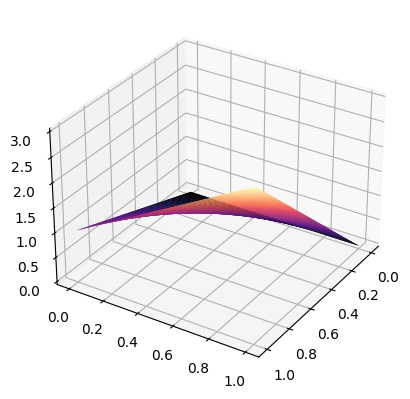

In [ ]:
#@title rotate 3d
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from IPython.display import HTML
import matplotlib.animation as animation
import numpy as np
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#####################################################
def function(x, y):
	return x+2*x*y


x = np.linspace(0, 1, 200)
y = np.linspace(0, 1, 200)
#####################################################
X, Y = np.meshgrid(x, y)
Z = function(X, Y)
#ax.grid(False)
#ax.set_axis_off()

def init():
    ax.plot_surface(X, Y, Z, cmap='magma', alpha=0.8)
    #ax.plot_wireframe(X, Y, Z, rstride=5, cstride=5)
    return fig,

def animate(i):
    ax.view_init(elev=30., azim=3.6*i)
    return fig,

# Animate
ani = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=10, interval=100, blit=True)

HTML(ani.to_html5_video())